In [ ]:
# import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
# import dataset 

In [3]:
df = pd.read_csv(r"D:\praivate\كورس\data analyze\project\House Sales in King County, USA\housing.csv")

In [ ]:
# prepare dataset

In [4]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     21613 non-null  int64  
 1   id             21613 non-null  int64  
 2   date           21613 non-null  object 
 3   price          21613 non-null  float64
 4   bedrooms       21600 non-null  float64
 5   bathrooms      21603 non-null  float64
 6   sqft_living    21613 non-null  int64  
 7   sqft_lot       21613 non-null  int64  
 8   floors         21613 non-null  float64
 9   waterfront     21613 non-null  int64  
 10  view           21613 non-null  int64  
 11  condition      21613 non-null  int64  
 12  grade          21613 non-null  int64  
 13  sqft_above     21613 non-null  int64  
 14  sqft_basement  21613 non-null  int64  
 15  yr_built       21613 non-null  int64  
 16  yr_renovated   21613 non-null  int64  
 17  zipcode        21613 non-null  int64  
 18  lat   

In [6]:
df.drop('Unnamed: 0',axis=1 ,inplace=True)

In [10]:
# clean dataset 

In [13]:
print('nm of missing data for the column bedrooms :' ,df['bedrooms'].isnull().sum() )
print('nm of missing data for the column bathrooms :',df['bathrooms'].isnull().sum() )      

nm of missing data for the column bedrooms : 13
nm of missing data for the column bathrooms : 10


In [14]:
mean = df['bedrooms'].mean()
df['bedrooms'].replace(np.nan , mean ,inplace= True )

In [15]:
mean2 = df['bathrooms'].mean()
df['bathrooms'].replace(np.nan , mean2 ,inplace= True )

In [18]:
# Exploratory Data Analysis

In [27]:
floors_count = df['floors'].value_counts().to_frame()
floors_count

,count
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


In [25]:
pd.set_option('display.max_columns', None)

In [28]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


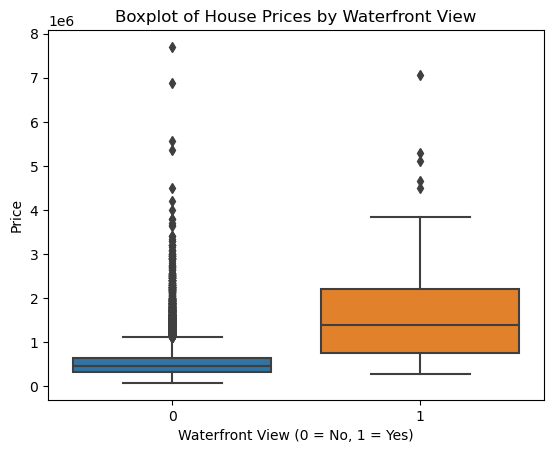

In [32]:
# determine whether houses with a waterfront view or without a waterfront view have more price outliers

sns.boxplot(x='waterfront', y='price', data=df)
plt.title('Boxplot of House Prices by Waterfront View')
plt.xlabel('Waterfront View (0 = No, 1 = Yes)')
plt.ylabel('Price')
plt.show()

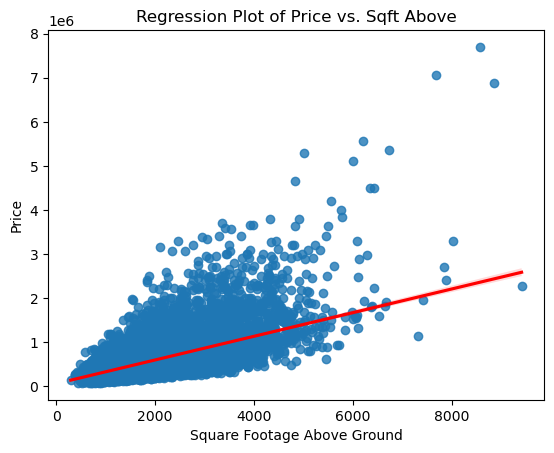

In [31]:
#determine if the feature sqft_above is negatively or positively correlated with price.

sns.regplot(x='sqft_above', y='price',line_kws={'color':'red'}, data=df)
plt.title('Regression Plot of Price vs. Sqft Above')
plt.xlabel('Square Footage Above Ground')
plt.ylabel('Price')
plt.show()

In [41]:
# Fit a linear regression model using the longitude feature 'long' and caculate the R^2.
X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.00046769430149007363

In [48]:
# Fit a linear regression model to predict the 'price' using the feature 'sqft_living' then calculate the R^2.
from sklearn.metrics import mean_squared_error, r2_score
X = df[['sqft_living']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
Y_pre = lm.predict(X)
r2 =  r2_score(Y, Y_pre)
r2


0.4928532179037931

In [49]:
# Fit a linear regression model to predict the 'price' using the list of features:
z =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]  
X = df[z] 
y = df['price'] 
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
r22 = r2_score(y, y_pred)
r22

0.6576951666037502

In [50]:
# create a pipeline object to predict the 'price', fit the object using the features in the list features, and calculate the R^2.
X = df[z]  
y = df['price']  
# Create a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  
    ('regressor', LinearRegression())  
])

# Fit the pipeline
pipeline.fit(X, y)

# Predict the prices
y_pred = pipeline.predict(X)

# Calculate the R²
r2 = r2_score(y, y_pred)

print(f"R²: {r2}")

R²: 0.65769516660375


In [51]:
# Model Evaluation and Refinement

In [52]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("done")

done


In [53]:
# We will split the data into training and testing sets:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


In [55]:
# Create and fit a Ridge regression object using the training data, set the regularization parameter to 0.1, and calculate the R^2 using the test data.
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(x_train, y_train)

# Calculate the R² using the test data
r2 = ridge_model.score(x_test, y_test)

print(f"R²: {r2}")

R²: 0.6478759163939112


In [56]:
# Perform a second order polynomial transform on both the training data and testing data. 
#Create and fit a Ridge regression object using the training data, set the regularisation parameter to 0.1,
#and calculate the R^2 utilising the test data provided.
polynomial_transformer = PolynomialFeatures(degree=2)
ridge_model = Ridge(alpha=0.1)

# Combine the polynomial transformation and Ridge regression into a pipeline
pipeline = Pipeline([
    ('polynomial', polynomial_transformer),
    ('ridge', ridge_model)
])

# Fit the pipeline with the training data
pipeline.fit(x_train, y_train)

# Predict the prices on the test data
y_pred = pipeline.predict(x_test)

# Calculate the R² using the test data
r2 = r2_score(y_test, y_pred)

print(f"R²: {r2}")

R²: 0.7002744259992868
